In [1]:
# import libraries

import pandas as pd 
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
# load csv data to a dataframe

df = pd.read_csv('files/Advertising.csv', index_col = 0)
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# set a dependent and independent variable

x3 = df['Newspaper']
x3.head()

1    69.2
2    45.1
3    69.3
4    58.5
5    58.4
Name: Newspaper, dtype: float64

In [6]:
y = df['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [7]:
x3.shape, y.shape

((200,), (200,))

In [8]:
type(x3), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

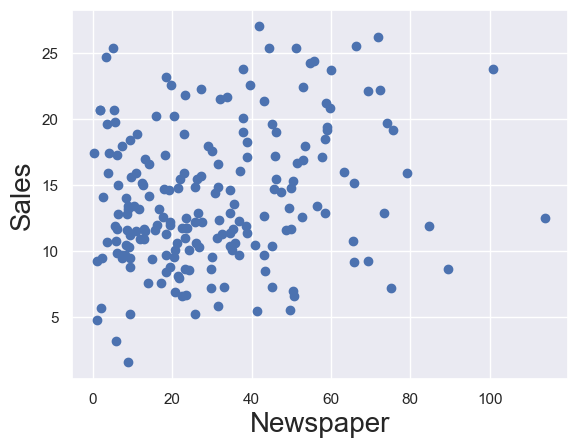

In [9]:
# explore data

plt.scatter(x3, y)
plt.xlabel('Newspaper', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

In [11]:
# regresion itself

x = sm.add_constant(x3)
x

,const,Newspaper
1,1.0,69.2
2,1.0,45.1
3,1.0,69.3
4,1.0,58.5
5,1.0,58.4
...,...,...
196,1.0,13.8
197,1.0,8.1
198,1.0,6.4
199,1.0,66.2


In [12]:
results = sm.OLS(y, x).fit()
results

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 24 Jan 2024   Prob (F-statistic):            0.00115
Time:                        07:03:23   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(results.summary()) # easier to read

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 24 Jan 2024   Prob (F-statistic):            0.00115
Time:                        07:03:24   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

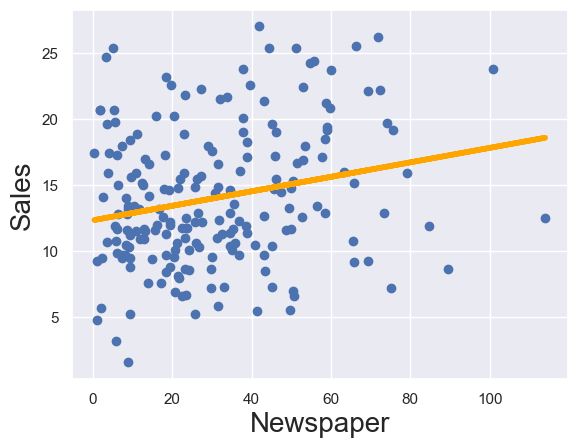

In [16]:
plt.scatter(x3, y)

y_hat = x3 * 0.0547 + 12.3514 # predicted values

fig = plt.plot(x3, y_hat, lw = 4, c = 'orange', label = 'regression line')

plt.xlabel('Newspaper', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()